In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Get the height/weight data

In [2]:
data = pd.read_html( "http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html" )

In [3]:
data = data[0].drop( columns = 0 )
data = data.drop( index = 0 )
data.columns = [ "height", "weight" ]
data.reset_index( drop = True, inplace = True )

In [4]:
data.height = data.height.apply( lambda x : float(x) )
data.weight = data.weight.apply( lambda x : float(x) )

data.height = ( data.height - data.height.min() )/ (data.height.max() - data.height.min() )
data.weight = ( data.weight - data.weight.min() )/ (data.weight.max() - data.weight.min() )

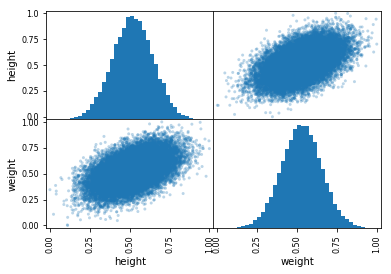

,height,weight
height,1.000000,0.502859
weight,0.502859,1.000000


In [5]:
pd.plotting.scatter_matrix( data, alpha = 0.3, hist_kwds = { "bins" : 40} )
plt.show()
data.corr()

# Create a training/test split

In [6]:
height = data.height.values.reshape( (len(data), 1) )
weight = data.weight.values.reshape( (len(data), 1) )
trHeight, teHeight, trWeight, teWeight = train_test_split( height, weight,
                                                           test_size = 0.20,
                                                           random_state = 0 )

## Predict weight given height

### Linear model

In [7]:
hwLin = LinearRegression()
hwLin.fit( trHeight, trWeight )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Random forest model

In [8]:
params = { "n_estimators" : [2, 3, 4, 5, 6, 7, 8, 9, 10 ,12, 16, 18, 20, 30 ],
           "max_depth" : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20 ,30 ],
           "min_samples_leaf" : [1, 2, 4, 5, 10 ,15, 20, 40, 60, 100 ] }

forest = RandomForestRegressor()

gridForest = GridSearchCV( forest, params, cv = 10, n_jobs = -1, verbose = 1 )
gridForest.fit( trHeight, trWeight.reshape( len(trWeight)) )

Fitting 10 folds for each of 1820 candidates, totalling 18200 fits


[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1533 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 5713 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 7533 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 9033 tasks      | elapsed:  5.4min


KeyboardInterrupt: 

In [ ]:
gridForest.best_score_

In [ ]:
gridForest.best_params_

In [ ]:
hwForest = RandomForestRegressor()
hwForest.fit( trHeight, trWeight.reshape( len(trWeight) ) )

### Evaluate the models

In [ ]:
predTrLin = hwLin.predict( trHeight )
predTeLin = hwLin.predict( teHeight )

predTrFor = hwForest.predict( trHeight )
predTeFor = hwForest.predict( teHeight )

trErrLin = mean_squared_error( trWeight, predTrLin )
teErrLin = mean_squared_error( teWeight, predTeLin )

trErrFor = mean_squared_error( trWeight, predTrFor )
teErrFor = mean_squared_error( teWeight, predTeFor )

print( "Linear Model:" )
print( f"  Training error: {trErrLin}")
print( f"  Test error: {teErrLin}")

print( "\nRandom Forest Model:" )
print( f"  Training error: {trErrFor}")
print( f"  Test error: {teErrFor}")

## Predict height given weight

### Linear model

In [ ]:
whLin = LinearRegression()
whLin.fit( trWeight, trHeight )

In [ ]:
predTr = whLin.predict( trWeight )
predTe = whLin.predict( teWeight )
trErr = mean_squared_error( trHeight, predTr )
teErr = mean_squared_error( teHeight, predTe )

print( f"Training error: {trErr}")
print( f"Test error: {teErr}")

### Random forest model

In [ ]:
params = { "n_estimators" : [2, 3, 4, 5, 6, 7, 8, 9, 10 ,12, 16, 18, 20, 30 ],
           "max_depth" : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20 ,30 ],
           "min_samples_leaf" : [1, 2, 4, 5, 10 ,15, 20, 40, 60, 100 ] }

forest = RandomForestRegressor()

gridForest = GridSearchCV( forest, params, cv = 10, n_jobs = -1, verbose = 1 )
gridForest.fit( trWeight, trHeight.reshape( len(trHeight)) )

In [ ]:
gridForest.best_score_

In [ ]:
gridForest.best_params_

In [ ]:
whForest = RandomForestRegressor()
whForest.fit( trWeight, trHeight.reshape( len(trHeight)) )

### Evaluate the models

In [ ]:
predTrLin = whLin.predict( trWeight )
predTeLin = whLin.predict( teWeight )

predTrFor = whForest.predict( trWeight )
predTeFor = whForest.predict( teWeight )

trErrLin = mean_squared_error( trHeight, predTrLin )
teErrLin = mean_squared_error( teHeight, predTeLin )

trErrFor = mean_squared_error( trHeight, predTrFor )
teErrFor = mean_squared_error( teHeight, predTeFor )

print( "Linear Model:" )
print( f"  Training error: {trErrLin}")
print( f"  Test error: {teErrLin}")

print( "\nRandom Forest Model:" )
print( f"  Training error: {trErrFor}")
print( f"  Test error: {teErrFor}")